<a href="https://colab.research.google.com/github/Jawad5747/Data-Science-and-Decision-Making-CE888/blob/main/Assignment%202/stop_and_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (16,8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

df_vt = pd.read_csv('/content/drive/MyDrive/stop-and-search.csv')
df_vt.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,01/07/2010,0:10,M,22.0,22.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,01/07/2010,0:10,F,21.0,21.0,White,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,01/07/2010,0:10,F,21.0,21.0,White,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,01/07/2010,0:11,F,18.0,18.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,01/07/2010,0:35,M,18.0,18.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [ ]:
df_vt.columns


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race_raw', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type_raw', 'search_type',
       'contraband_found', 'stop_outcome', 'is_arrested', 'officer_id'],
      dtype='object')

In [ ]:
df_vt.count()
# Fill missing search type values with placeholder
df_vt['search_type'].fillna('N/A', inplace=True)

# Drop rows with missing values
df_vt.dropna(inplace=True)

df_vt.count()

stop_date           274054
stop_time           274054
driver_gender       274054
driver_age_raw      274054
driver_age          274054
driver_race_raw     274054
driver_race         274054
violation_raw       274054
violation           274054
search_conducted    274054
search_type_raw     274054
search_type         274054
contraband_found    274054
stop_outcome        274054
is_arrested         274054
officer_id          274054
dtype: int64

In [ ]:
# check out the stop reasons of traffic
df_vt['violation'].value_counts()


Moving violation      212809
Equipment              50711
Other                   9808
DUI                      724
Other (non-mapped)         2
Name: violation, dtype: int64

In [ ]:
# stop outcome explore 
df_vt['stop_outcome'].value_counts()

Written Warning         166973
Citation                103770
Arrest for Violation      3225
Warrant Arrest              76
Verbal Warning              10
Name: stop_outcome, dtype: int64

In [ ]:
df_vt['driver_gender'].value_counts()


M    174672
F     99382
Name: driver_gender, dtype: int64

In [ ]:
df_vt['driver_race'].value_counts()


White       262184
Black         5586
Asian         3451
Hispanic      2568
Other          265
Name: driver_race, dtype: int64

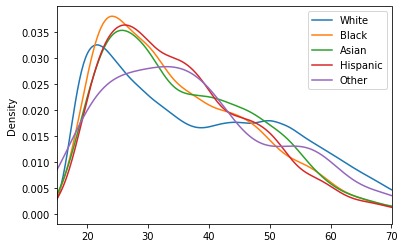

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(15, 70)
for race in df_vt['driver_race'].unique():
    s = df_vt[df_vt['driver_race'] == race]['driver_age']
    s.plot.kde(ax=ax, label=race)
ax.legend()

In [ ]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['stop_outcome'] == 'Written Warning'])
    n_citations = len(df[df['stop_outcome'] == 'Citation'])
    n_arrests = len(df[df['stop_outcome'] == 'Arrest for Violation'])
    citations_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))

In [ ]:
compute_outcome_stats(df_vt)

n_total                  274054.000000
n_warnings               166973.000000
n_citations              103770.000000
n_arrests                  3225.000000
citations_per_warning         0.621478
arrest_rate                   0.011768
dtype: float64

In [ ]:
df_vt.groupby('driver_gender').apply(compute_outcome_stats)


,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
driver_gender,,,,,,
F,99382.0,63696.0,34958.0,703.0,0.548826,0.007074
M,174672.0,103277.0,68812.0,2522.0,0.666286,0.014438


In [ ]:
df_vt.groupby('driver_race').apply(compute_outcome_stats)


,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
driver_race,,,,,,
Asian,3451.0,1711.0,1718.0,22.0,1.004091,0.006375
Black,5586.0,3029.0,2439.0,112.0,0.805216,0.020050
Hispanic,2568.0,1351.0,1171.0,43.0,0.866765,0.016745
Other,265.0,126.0,132.0,7.0,1.047619,0.026415
White,262184.0,160756.0,98310.0,3041.0,0.611548,0.011599


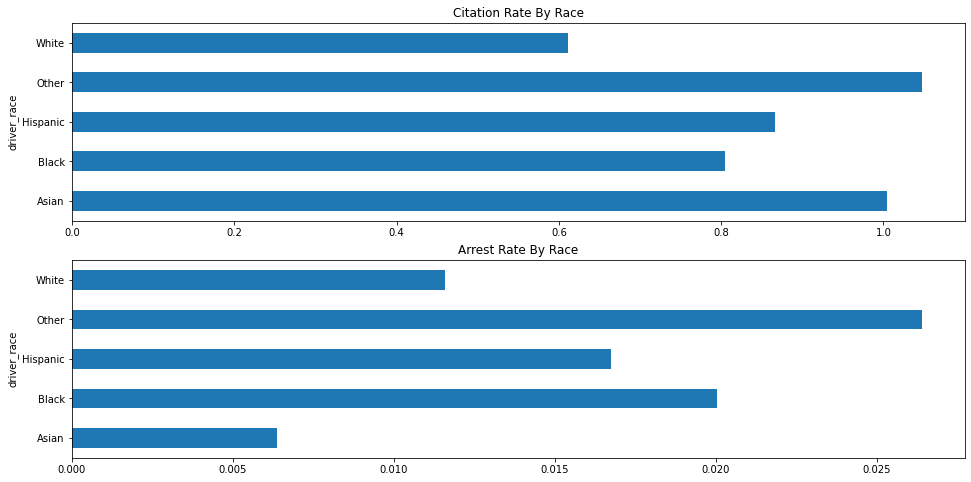

In [ ]:
race_agg = df_vt.groupby(['driver_race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Race')

In [ ]:
df_vt.groupby(['driver_race','violation']).apply(compute_outcome_stats)


n_total  ...  arrest_rate
driver_race violation                     ...             
Asian       DUI                     10.0  ...     0.200000
            Equipment              319.0  ...     0.006270
            Moving violation      3061.0  ...     0.005554
            Other                   61.0  ...     0.016393
Black       DUI                     11.0  ...     0.272727
            Equipment              893.0  ...     0.029115
            Moving violation      4435.0  ...     0.016009
            Other                  247.0  ...     0.048583
Hispanic    DUI                     10.0  ...     0.200000
            Equipment              383.0  ...     0.023499
            Moving violation      2095.0  ...     0.012411
            Other                   80.0  ...     0.075000
Other       Equipment               43.0  ...     0.069767
            Moving violation       209.0  ...     0.014354
            Other                   13.0  ...     0.076923
White       DUI                    693.0  ...     0.200577
            Equipment            49073.0  ...     0.012206
            Moving violation    203009.0  ...     0.008615
            Other                 9407.0  ...     0.058892
            Other (non-mapped)       2.0  ...     0.000000

[20 rows x 6 columns]

In [ ]:
# Create new column to represent whether the driver is white
df_vt['is_white'] = df_vt['driver_race'] == 'White'

# Remove violation with too few data points
df_vt_filtered = df_vt[~df_vt['violation'].isin(['Other (non-mapped)', 'DUI'])]

df_vt_filtered.groupby(['is_white','violation']).apply(compute_outcome_stats)


n_total  ...  arrest_rate
is_white violation                   ...             
False    Equipment           1638.0  ...     0.024420
         Moving violation    9800.0  ...     0.011939
         Other                401.0  ...     0.049875
True     Equipment          49073.0  ...     0.012206
         Moving violation  203009.0  ...     0.008615
         Other               9407.0  ...     0.058892

[6 rows x 6 columns]

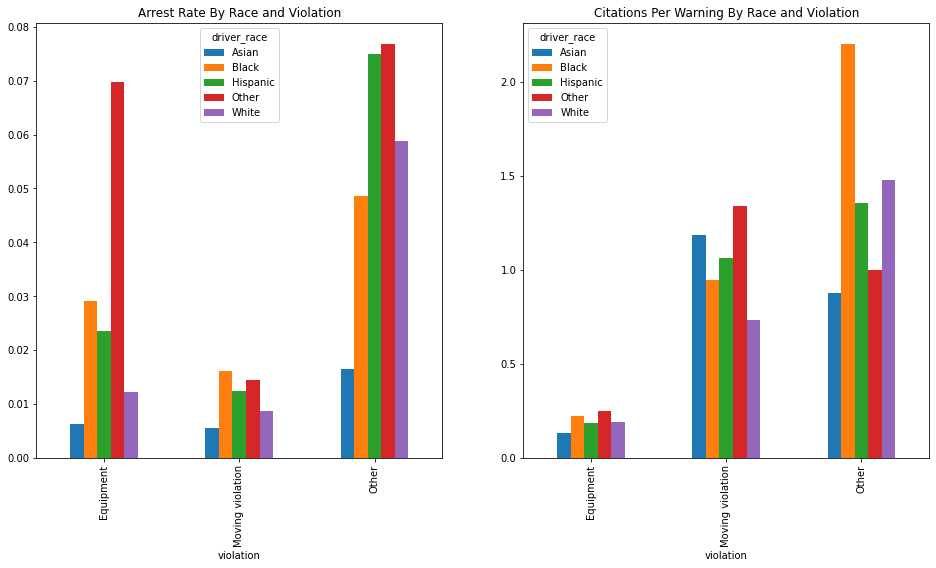

In [ ]:
race_stats = df_vt_filtered.groupby(['violation', 'driver_race']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
race_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrest Rate By Race and Violation')
race_stats.plot.bar(y='citations_per_warning', ax=axes[1], title='Citations Per Warning By Race and Violation')

In [ ]:
def compute_search_stats(df):
    """Compute the search rate and hit rate"""
    search_conducted = df['search_conducted']
    contraband_found = df['contraband_found']
    n_stops     = len(search_conducted)
    n_searches  = sum(search_conducted)
    n_hits      = sum(contraband_found)

    # Filter out counties with too few stops
    if (n_stops) < 50:
        search_rate = None
    else:
        search_rate = n_searches / n_stops

    # Filter out counties with too few searches
    if (n_searches) < 5:
        hit_rate = None
    else:
        hit_rate = n_hits / n_searches

    return(pd.Series(data = {
        'n_stops': n_stops,
        'n_searches': n_searches,
        'n_hits': n_hits,
        'search_rate': search_rate,
        'hit_rate': hit_rate
    }))

    


In [ ]:
compute_search_stats(df_vt)

n_stops        274054.000000
n_searches       3276.000000
n_hits           2610.000000
search_rate         0.011954
hit_rate            0.796703
dtype: float64

In [ ]:
df_vt.groupby('driver_gender').apply(compute_search_stats)


,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_gender,,,,,
F,99382.0,646.0,510.0,0.006500,0.789474
M,174672.0,2630.0,2100.0,0.015057,0.798479


In [ ]:
age_groups = pd.cut(df_vt["driver_age"], np.arange(15, 70, 5))
df_vt.groupby(age_groups).apply(compute_search_stats)

,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_age,,,,,
"(15, 20]",27524.0,673.0,570.0,0.024451,0.846954
"(20, 25]",43460.0,1003.0,840.0,0.023079,0.837488
"(25, 30]",34898.0,634.0,502.0,0.018167,0.791798
"(30, 35]",27856.0,375.0,288.0,0.013462,0.768000
"(35, 40]",23313.0,215.0,160.0,0.009222,0.744186
"(40, 45]",24170.0,127.0,88.0,0.005254,0.692913
"(45, 50]",24205.0,106.0,61.0,0.004379,0.575472
"(50, 55]",22607.0,77.0,53.0,0.003406,0.688312
"(55, 60]",17570.0,36.0,30.0,0.002049,0.833333


In [ ]:
df_vt.groupby('driver_race').apply(compute_search_stats)


,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_race,,,,,
Asian,3451.0,28.0,22.0,0.008114,0.785714
Black,5586.0,284.0,195.0,0.050841,0.686620
Hispanic,2568.0,106.0,69.0,0.041277,0.650943
Other,265.0,10.0,6.0,0.037736,0.600000
White,262184.0,2848.0,2318.0,0.010863,0.813904
